# 数据科学导论大作业AwesomeLoan by archester-250,1475505

## 第一部分：数据预处理

In [1]:
# 导库
import numpy as np
import pandas as pd

In [2]:
# 导入数据库
df = pd.read_csv('train-data.csv', index_col = None)

## 第二部分：数据探索

### 字符串值处理

In [3]:
# 将字符串值转为离散值
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,1392884.0,29,11,single,rented,yes,Scientist,Varanasi,Uttar_Pradesh,5,14,0
1,1,2800634.0,0,12,single,rented,no,Web_designer,Agra,Uttar_Pradesh,8,13,0
2,2,4121059.0,52,17,single,rented,no,Aviator,Saharanpur,Uttar_Pradesh,5,10,0
3,3,4065331.0,70,14,single,rented,no,Civil_engineer,Pune,Maharashtra,9,14,0
4,4,NaN,74,13,single,rented,no,Lawyer,Junagadh,Gujarat,3,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,201595,NaN,56,5,single,norent_noown,no,Technician,Thane,Maharashtra,5,10,0
201596,201596,6298025.0,0,2,single,rented,no,Fashion_Designer,Loni,Uttar_Pradesh,2,12,0
201597,201597,1667463.0,0,16,married,rented,yes,Police_officer,Bhusawal,Maharashtra,10,11,0
201598,201598,1238515.0,0,4,single,rented,yes,Civil_engineer,Belgaum,Karnataka,4,13,0


可以看到，是否已婚、房子拥有形式、是否有车、专业、城市、州是离散值，需要离散化。

In [4]:
stringTrait = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for trait in stringTrait:
    df[trait] = pd.Categorical(df[trait]).codes

另外注意到id列无用，可以删除。

In [5]:
#删除id
df.drop(columns=['Id'], inplace=True)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1392884.0,29,11,1,2,1,41,309,25,5,14,0
1,2800634.0,0,12,1,2,0,50,2,25,8,13,0
2,4121059.0,52,17,1,2,0,5,255,25,5,10,0
3,4065331.0,70,14,1,2,0,10,236,14,9,14,0
4,NaN,74,13,1,2,0,30,141,6,3,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201595,NaN,56,5,1,0,0,48,290,14,5,10,0
201596,6298025.0,0,2,1,2,0,22,172,25,2,12,0
201597,1667463.0,0,16,0,2,1,38,55,14,10,11,0
201598,1238515.0,0,4,1,2,1,10,37,11,4,13,0


### 初步分析

In [6]:
#我们先看看有什么属性和对应的特征。
df.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,1.912070e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,4.997339e+06,44.385208,10.085625,0.898006,1.891166,0.301612,25.261890,158.227262,13.796974,6.334072,11.995928,0.122778
std,2.881432e+06,22.491666,6.002003,0.302641,0.393065,0.458959,14.737424,92.169678,9.366680,3.644423,1.399482,0.328183
min,1.031000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,2.499018e+06,29.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,5.000063e+06,46.000000,10.000000,1.000000,2.000000,0.000000,25.000000,158.000000,14.000000,6.000000,12.000000,0.000000
75%,7.480562e+06,63.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [7]:
# 这么看也是很不错的
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201600 entries, 0 to 201599
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Income             191207 non-null  float64
 1   Age                201600 non-null  int64  
 2   Experience         201600 non-null  int64  
 3   Married/Single     201600 non-null  int8   
 4   House_Ownership    201600 non-null  int8   
 5   Car_Ownership      201600 non-null  int8   
 6   Profession         201600 non-null  int8   
 7   CITY               201600 non-null  int16  
 8   STATE              201600 non-null  int8   
 9   CURRENT_JOB_YRS    201600 non-null  int64  
 10  CURRENT_HOUSE_YRS  201600 non-null  int64  
 11  Risk_Flag          201600 non-null  int64  
dtypes: float64(1), int16(1), int64(5), int8(5)
memory usage: 10.6 MB


## 缺失值处理

看，我们发现了什么？Income居然有空的情况，可能是不好意思写上去吧，这个时候有两种选择：
- 用统计特征值代替
- 直接丢弃对应的列

选哪个呢？[TODO]

In [8]:
# 我们还可以看一些有关房子年龄的分类统计
df['CURRENT_HOUSE_YRS'].value_counts().head(10)

12    41478
11    41386
13    40495
14    39138
10    39103
Name: CURRENT_HOUSE_YRS, dtype: int64

这么平均的吗

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

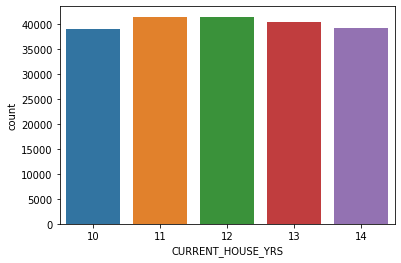

In [9]:
# 我们不妨可视化一下这些指标吧
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x = "CURRENT_HOUSE_YRS", data = df)

In [10]:
# hh，尝试结束。接下来我们绘制Income的分布图看看
import plotly.express as px
px.histogram(df, x = "Income")

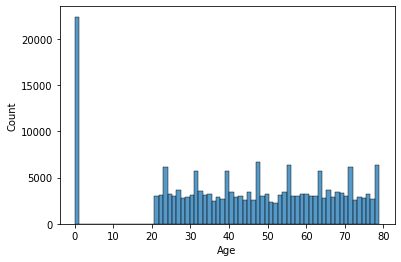

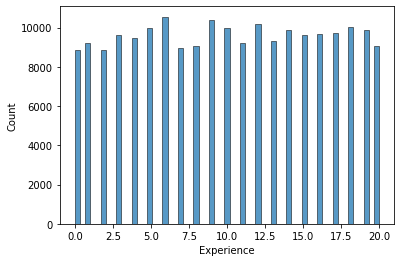

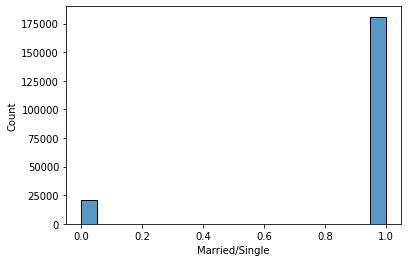

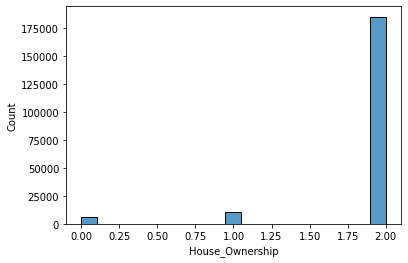

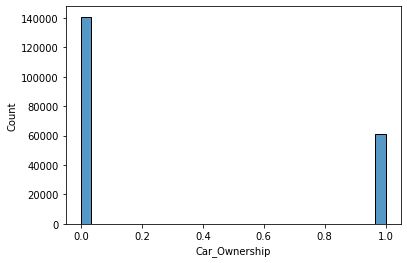

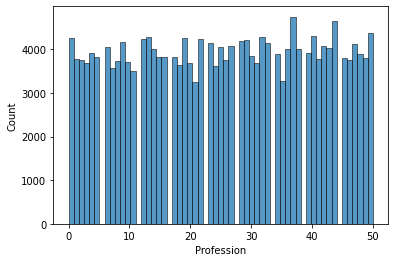

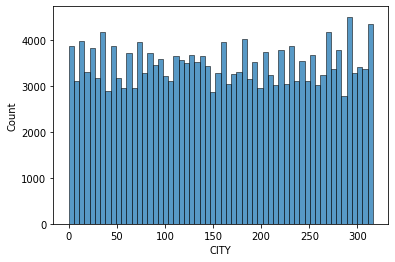

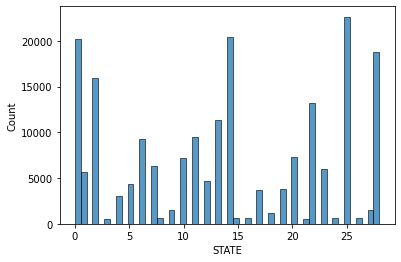

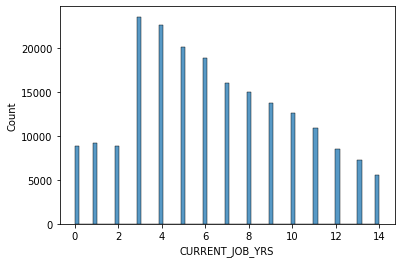

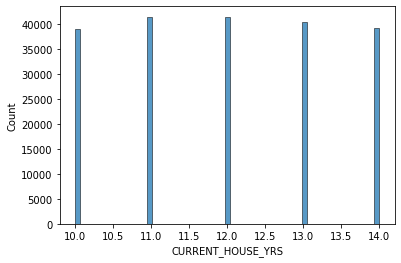

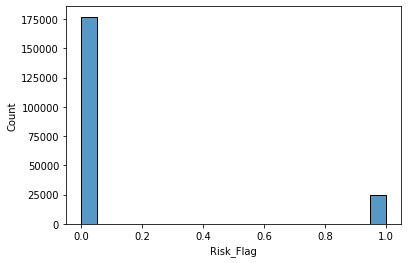

In [11]:
# 好平均啊，我们需要看看别的分布情况，来判断选择哪种处理方式了。[TODO]排版
for i in df.columns[1:]:
    sns.histplot(x = i, data = df, kde=False)
    plt.show()

好吧，还有异常值。(wxl注：没注意到尚未处理income，亮神自由发挥)

处理完income值后，因为从图上看目前只有age有异常值，所以可以考虑用回归分析预测异常值并填充。

In [12]:
# 使用回归分析填充异常值(未完成，字符串需要onehot处理)
# from sklearn.ensemble import RandomForestRegressor
# train_df_age = df.loc[df['Age'] != 0]
# predict_df_age = df.loc[df['Age'] == 0]
# X = df.drop(columns=['Age']).values
# Y = df['Age'].values
# print(Y.shape)
# regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
# regr.fit(X, Y)
# predict_age = regr.predict(df.drop(columns=['Age']))
# df.loc[df['Age'] == 0, 'Age'] = predict_age

### 标准化

## 第三部分：查看AUC